In [1]:
import folium


In [3]:
import pandas as pd  
import matplotlib.pyplot as plt  
import geopandas as gpd  
import shapely

In [4]:
lat = 43.7031000
lon = -72.28854
map = folium.Map()
marker = folium.Marker(location=[lat,lon])
marker.add_to(map)
map

map = folium.Map(location=[lat, lon], zoom_start=12)
marker = folium.Marker(location=[lat,lon])
marker.add_to(map)
map

map = folium.Map(location=[lat, lon], zoom_start=10)
marker = folium.Marker(location=[lat,lon],popup="Here's a point of interest!")
marker.add_to(map)
map



points_csv = pd.read_csv("https://rcweb.dartmouth.edu/homes/f002d69/workshops/data/bear-sightings.csv")
points_csv.head(3)


,bear.id,longitude,latitude
0,7,-148.956023,62.658220
1,57,-152.622839,58.350642
2,69,-144.937397,62.382270


In [5]:
file_name_url = "https://rcweb.dartmouth.edu/homes/f002d69/workshops/data/nationalparks_ak.zip" 

#from google.colab import files
#uploaded = files.upload()

#file_name = list(uploaded.keys())[0]
polygons_shapefile_zipped = gpd.read_file(file_name_url)
polygons_shapefile_zipped.head(3)


,Unit_Code,Unit_Name,Unit_Type,NPS_Region,ScaleRank,FeatureCla,Note,Name,geometry
0,YUCH,Yukon-Charley Rivers N PRES,National Preserve,Alaska,4,National Park Service,None,Yukon-Charley Rivers N PRES,"POLYGON ((-142.34907 64.99516, -142.34907 64.9..."
1,NOAT,Noatak N PRES,National Preserve,Alaska,4,National Park Service,None,Noatak N PRES,"POLYGON ((-155.65266 68.02284, -155.65266 68.0..."
2,KOVA,Kobuk Valley NP,National Park,Alaska,4,National Park Service,None,Kobuk Valley,"POLYGON ((-157.85947 67.42408, -157.85947 67.4..."


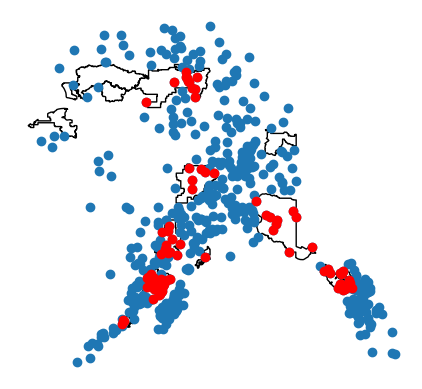

In [6]:
points = gpd.GeoDataFrame(points_csv, geometry=gpd.points_from_xy(points_csv.longitude, points_csv.latitude))
points.head(2)

points.crs='EPSG:4326'
points = points.to_crs(polygons_shapefile_zipped.crs)
points.crs.to_epsg()

points_in_polygons = gpd.sjoin(points, polygons_shapefile_zipped, predicate='within')
points_in_polygons.head(2)

polygons_shapefile_zipped.plot(facecolor='none')
points.plot(ax=plt.gca())
points_in_polygons.plot(color='red',ax=plt.gca())
plt.axis("off")
plt.show()


In [8]:
# create a folium map, complete with in-notebook zoom tools
map = folium.Map(location=[62.65822, -148.95602],
    zoom_start=5,
    control_scale=True)
# loop through points
for index, row in points.iterrows():
    folium.CircleMarker(location=[ row.latitude,row.longitude], radius =5).add_to(map)
# loop through points in polygons, color them gray
for index, row in points_in_polygons.iterrows():
    folium.CircleMarker(location=[ row.latitude,row.longitude], color = 'gray',fill=True, fill_opacity=1).add_to(map)
map
